# Cartopy Showcase
This notebook closely follows the Earth and Enviromental Data Science course at https://earth-env-data-science.github.io/intro.html

In [1]:
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import urllib
import pandas as pd
import numpy as np
import xarray as xr
import datetime
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)

In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

# North American Regional Reanlysis (NARR)

In [2]:
heightData = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/pressure/hgt.201810.nc')
precipData = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/monolevel/apcp.2018.nc')

C:\Users\philipc2\Anaconda3\lib\site-packages\xarray\conventions.py:520: SerializationWarning: variable 'hgt' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
C:\Users\philipc2\Anaconda3\lib\site-packages\xarray\conventions.py:520: SerializationWarning: variable 'apcp' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


test


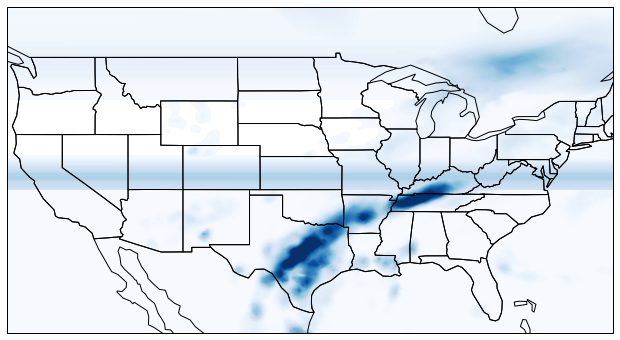

In [29]:
# Data from Oct. 15, 2018
data1 = precipData.sel(time='2018-10-15')
data2 = heightData.sel(time='2018-10-15')


# Plotting
entral_lat = 37.5
central_lon = -96
extent = [-125, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black')
ax.add_feature(cartopy.feature.COASTLINE, edgecolor='black')
ax.add_feature(cartopy.feature.STATES, edgecolor='black')

print('test')
#plt.contourf(data.solar_mon.lon, data.solar_mon.lat, timeMean.solar_mon, 100, cmap = 'coolwarm')
im = ax.contourf(data1.apcp.lon, data1.apcp.lat, data1.apcp, 500, cmap = 'Blues', vmax = 50)
#im2 = ax.contour(data2.hgt.lon, data2.hgt.lat, data2.hgt)





<xarray.DataArray 'level' (level: 29)>
array([1000.,  975.,  950.,  925.,  900.,  875.,  850.,  825.,  800.,  775.,
        750.,  725.,  700.,  650.,  600.,  550.,  500.,  450.,  400.,  350.,
        300.,  275.,  250.,  225.,  200.,  175.,  150.,  125.,  100.],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2018-10-15
  * level    (level) float32 1e+03 975.0 950.0 925.0 ... 175.0 150.0 125.0 100.0
Attributes:
    GRIB_id:             100
    GRIB_name:           hPa
    actual_range:        [1000.  100.]
    axis:                Z
    coordinate_defines:  point
    long_name:           Level
    positive:            down
    standard_name:       level
    units:               millibar

#  Antarctic Sea Ice